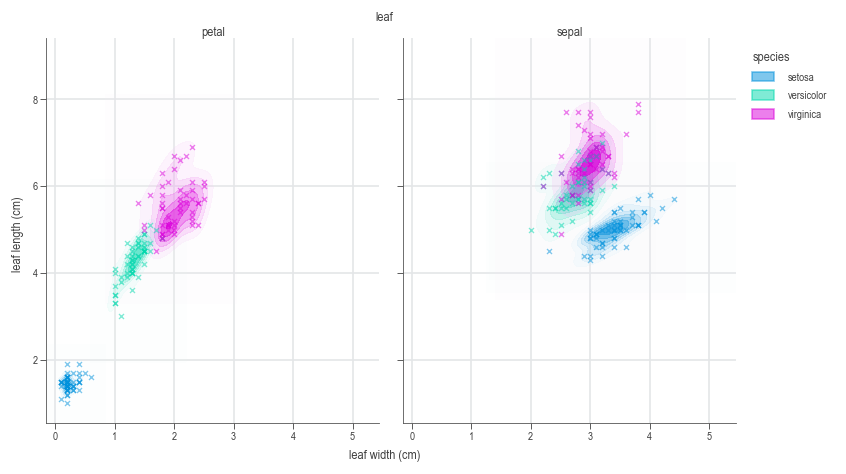

In [1]:
import daspi
df = daspi.load_dataset('iris')

chart = daspi.MultipleVariateChart(
        source=df,
        target='length',
        feature='width',
        hue='species',
        col='leaf',
        markers=('x',)
    ).plot(
        daspi.GaussianKDEContour
    ).plot(
        daspi.Scatter
    ).label(
        feature_label='leaf width (cm)',
        target_label='leaf length (cm)',
    )

chart.save('docs/img/iris_sepal_length_species.png')

In [2]:
import pandas as pd
import daspi
df = daspi.load_dataset('aspirin-dissolution')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee     48 non-null     object 
 1   stirrer      48 non-null     object 
 2   brand        48 non-null     object 
 3   catalyst     48 non-null     bool   
 4   water        48 non-null     object 
 5   temperature  48 non-null     float64
 6   preparation  48 non-null     float64
 7   dissolution  48 non-null     float64
 8   time         48 non-null     float64
dtypes: bool(1), float64(4), object(4)
memory usage: 3.2+ KB


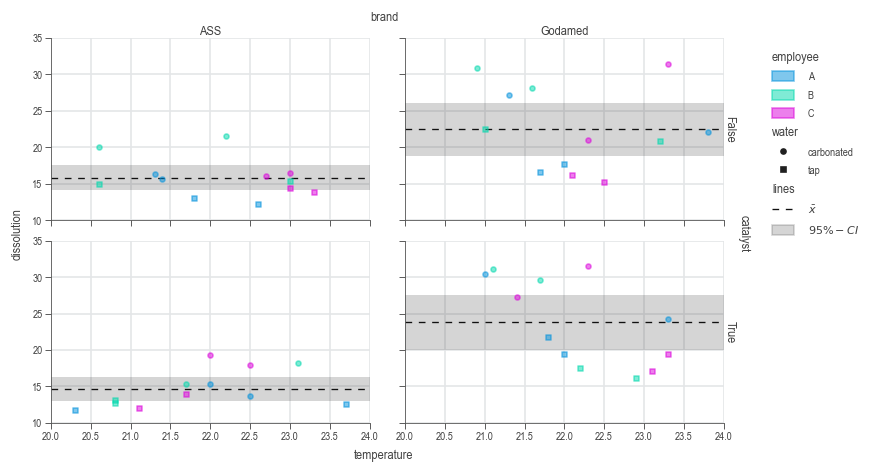

In [3]:
chart = daspi.MultipleVariateChart(
        source=df,
        target='dissolution',
        feature='temperature',
        hue='employee',
        shape='water',
        col='brand',
        row='catalyst',
        stretch_figsize=False
    ).plot(
        daspi.Scatter
    ).stripes(
        mean=True,
        confidence=0.95
    ).label(
        feature_label=True,
        target_label=True
    )

In [4]:
model = daspi.LinearModel(
    source=df,
    target='dissolution',
    categorical=[
        'employee',
        'stirrer',
        'brand',
        'catalyst',
        'water'],
    continuous=['temperature'],
    order=2)

goodness_of_fit = model.recursive_feature_elimination()
df_gof = pd.concat(goodness_of_fit)
df_gof

,formula,hierarchical,least_term,p_least,s,aic,r2,r2_adj,r2_pred
0,y ~ x0 + x1 + x0:x1 + x2 + x0:x2 + x1:x2 + x3 ...,True,stirrer,0.779139,2.176163,225.246701,0.923004,0.865971,0.762485
1,y ~ x0 + x0:x1 + x2 + x0:x2 + x1:x2 + x3 + x0:...,False,employee:stirrer,0.816191,2.176163,225.246701,0.923004,0.865971,0.762485
2,y ~ x0 + x2 + x0:x2 + x1:x2 + x3 + x0:x3 + x1:...,False,catalyst,0.588764,2.135229,222.853747,0.920383,0.870965,0.785847
3,y ~ x0 + x2 + x0:x2 + x1:x2 + x0:x3 + x1:x3 + ...,False,employee:brand,0.500799,2.135229,222.853747,0.920383,0.870965,0.785847
4,y ~ x0 + x2 + x1:x2 + x0:x3 + x1:x3 + x2:x3 + ...,False,stirrer:catalyst,0.460993,2.115042,221.143021,0.916494,0.873394,0.804807
5,y ~ x0 + x2 + x1:x2 + x0:x3 + x2:x3 + x4 + x0:...,False,temperature,0.386141,2.100360,219.998204,0.914993,0.875145,0.810880
6,y ~ x0 + x2 + x1:x2 + x0:x3 + x2:x3 + x4 + x0:...,False,catalyst:water,0.406235,2.093092,219.142497,0.912942,0.876008,0.815811
7,y ~ x0 + x2 + x1:x2 + x0:x3 + x2:x3 + x4 + x0:...,False,stirrer:brand,0.291691,2.084078,218.161118,0.911074,0.877074,0.822764
8,y ~ x0 + x2 + x0:x3 + x2:x3 + x4 + x0:x4 + x2:x4,False,employee:water,0.156274,2.100099,217.639880,0.904390,0.875176,0.830027
9,y ~ x0 + x2 + x0:x3 + x2:x3 + x4 + x2:x4,False,brand:catalyst,0.052854,2.152243,218.589591,0.894005,0.868901,0.830878


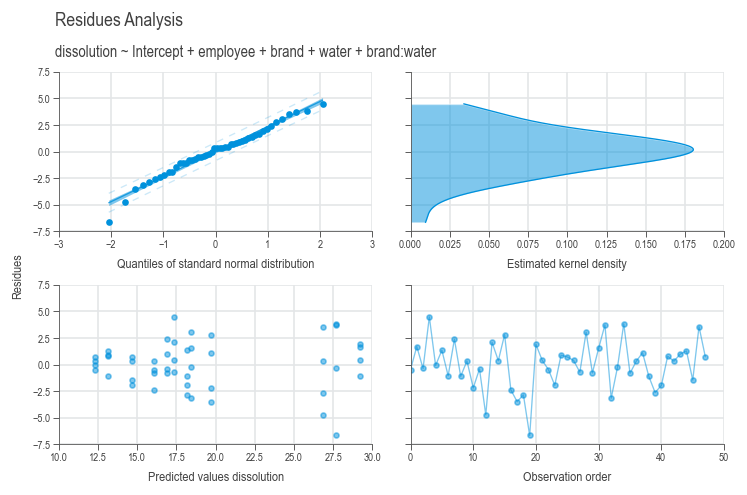

In [5]:
daspi.ResiduesCharts(model).plot().label(info=False)

In [6]:
model.anova(vif=True)

Typ-III,DF,SS,MS,F,p,n2,VIF
Source,,,,,,,
Intercept,1,2068.316806,2068.316806,366.777031,2.275979e-22,0.640415,5.0
employee,2,46.431667,23.215833,4.116891,2.329817e-02,0.014377,1.0
brand,1,693.375000,693.375000,122.956997,4.695450e-14,0.214690,1.0
water,1,86.640000,86.640000,15.363972,3.212100e-04,0.026826,1.0
brand:water,1,98.040833,98.040833,17.385695,1.493044e-04,0.030356,1.0
Residual,42,236.845000,5.639167,NaN,NaN,0.073335,NaN


In [7]:
model.summary()

Dep. Variable:,dissolution,R-squared:,0.857
Model:,OLS,Adj. R-squared:,0.840
Method:,Least Squares,F-statistic:,50.50
Date:,"Wed, 20 Nov 2024",Prob (F-statistic):,1.10e-16
Time:,16:06:49,Log-Likelihood:,-106.42
No. Observations:,48,AIC:,224.8
Df Residuals:,42,BIC:,236.1
Df Model:,5,,
Covariance Type:,nonrobust,,
Omnibus:,3.076,Durbin-Watson:,2.084
Prob(Omnibus):,0.215,Jarque-Bera (JB):,2.033


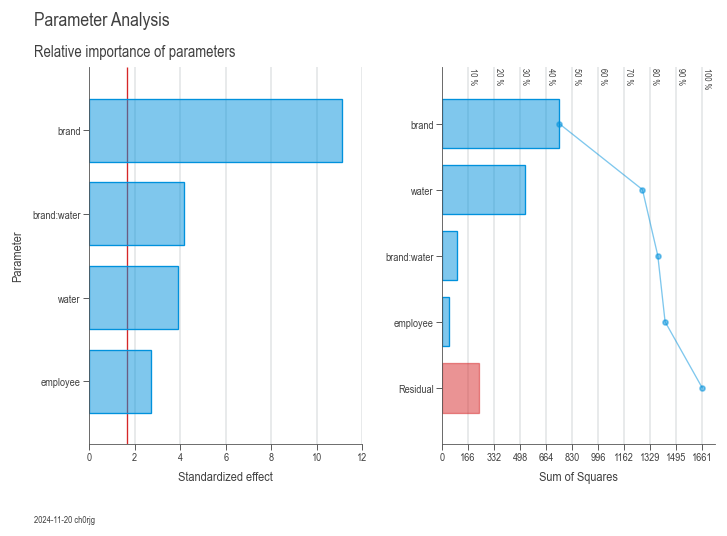

In [8]:
daspi.ParameterRelevanceCharts(model).plot().label()